In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 605


In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
queryURL = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
     
    city_url = f"{queryURL}{city}"
        
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
        
       
    # Run an API request for each of the cities
        
    try:
        
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
     
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
       
        print("city_found")
   # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | florianopolis
city_found
Processing Record 2 of Set 1 | lagoa
city_found
Processing Record 3 of Set 1 | severo-kurilsk
city_found
Processing Record 4 of Set 1 | bethlehem
city_found
Processing Record 5 of Set 1 | puerto ayora
city_found
Processing Record 6 of Set 1 | ushuaia
city_found
Processing Record 7 of Set 1 | barabai
city_found
Processing Record 8 of Set 1 | upernavik
city_found
Processing Record 9 of Set 1 | busselton
city_found
Processing Record 10 of Set 1 | saint george
city_found
Processing Record 11 of Set 1 | clyde river
city_found
Processing Record 12 of Set 1 | hualmay
city_found
Processing Record 13 of Set 1 | mataura
city_found
Processing Record 14 of Set 1 | brae
city_found
Processing Record 15 of Set 1 | rikitea
city_found
Processing Record 16 of Set 1 | new norfolk
city_found
Processing Record 17 of Set 1 | bluff
city_found
Processing Record 18 of Set 1 | guerrero negro
city_

city_found
Processing Record 4 of Set 4 | isla mujeres
city_found
Processing Record 5 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 4 | torbay
city_found
Processing Record 7 of Set 4 | payakumbuh
city_found
Processing Record 8 of Set 4 | kaitangata
city_found
Processing Record 9 of Set 4 | alihe
city_found
Processing Record 10 of Set 4 | faanui
city_found
Processing Record 11 of Set 4 | kondagaon
city_found
Processing Record 12 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 4 | nikolskoye
city_found
Processing Record 14 of Set 4 | samusu
City not found. Skipping...
Processing Record 15 of Set 4 | dhangadhi
city_found
Processing Record 16 of Set 4 | russell
city_found
Processing Record 17 of Set 4 | marawi
city_found
Processing Record 18 of Set 4 | alakurtti
city_found
Processing Record 19 of Set 4 | provideniya
city_found
Processing Record 20 of Set 4 | terrace bay
city_found
Processing Record 21 of Set 4 | dharchul

city_found
Processing Record 4 of Set 7 | velikooktyabrskiy
city_found
Processing Record 5 of Set 7 | general pico
city_found
Processing Record 6 of Set 7 | lujan
city_found
Processing Record 7 of Set 7 | babanusah
City not found. Skipping...
Processing Record 8 of Set 7 | mullaitivu
City not found. Skipping...
Processing Record 9 of Set 7 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 7 | laguna
city_found
Processing Record 11 of Set 7 | asnaes
city_found
Processing Record 12 of Set 7 | sobolevo
city_found
Processing Record 13 of Set 7 | bilibino
city_found
Processing Record 14 of Set 7 | balikpapan
city_found
Processing Record 15 of Set 7 | ko samui
city_found
Processing Record 16 of Set 7 | sao jose da coroa grande
city_found
Processing Record 17 of Set 7 | tobermory
city_found
Processing Record 18 of Set 7 | challapata
city_found
Processing Record 19 of Set 7 | mardin
city_found
Processing Record 20 of Set 7 | tuatapere
city_found
Processing Record 21 of Set

city_found
Processing Record 7 of Set 10 | isabela
city_found
Processing Record 8 of Set 10 | yatou
city_found
Processing Record 9 of Set 10 | zhigansk
city_found
Processing Record 10 of Set 10 | port hardy
city_found
Processing Record 11 of Set 10 | cayenne
city_found
Processing Record 12 of Set 10 | constitucion
city_found
Processing Record 13 of Set 10 | kargasok
city_found
Processing Record 14 of Set 10 | linhares
city_found
Processing Record 15 of Set 10 | channel-port aux basques
city_found
Processing Record 16 of Set 10 | fuente de oro
city_found
Processing Record 17 of Set 10 | mari-turek
city_found
Processing Record 18 of Set 10 | paamiut
city_found
Processing Record 19 of Set 10 | toccoa
city_found
Processing Record 20 of Set 10 | nurota
city_found
Processing Record 21 of Set 10 | rio branco
city_found
Processing Record 22 of Set 10 | pilisszentkereszt
city_found
Processing Record 23 of Set 10 | maungaturoto
city_found
Processing Record 24 of Set 10 | fontaine
city_found
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,florianopolis,-27.6146,-48.5012,29.24,70,40,3.60,BR,1678114795
1,lagoa,39.0500,-27.9833,15.73,88,93,11.61,PT,1678114796
2,severo-kurilsk,50.6789,156.1250,-1.21,90,97,4.97,RU,1678114796
3,bethlehem,-1.4558,-48.5044,31.02,66,40,4.63,BR,1678114649
4,puerto ayora,-0.7393,-90.3518,26.98,88,41,1.34,EC,1678114605


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,florianopolis,-27.6146,-48.5012,29.24,70,40,3.60,BR,1678114795
1,lagoa,39.0500,-27.9833,15.73,88,93,11.61,PT,1678114796
2,severo-kurilsk,50.6789,156.1250,-1.21,90,97,4.97,RU,1678114796
3,bethlehem,-1.4558,-48.5044,31.02,66,40,4.63,BR,1678114649
4,puerto ayora,-0.7393,-90.3518,26.98,88,41,1.34,EC,1678114605


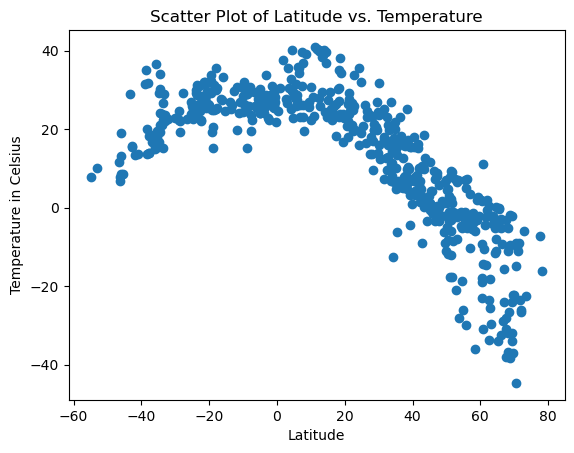

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Celsius")
# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

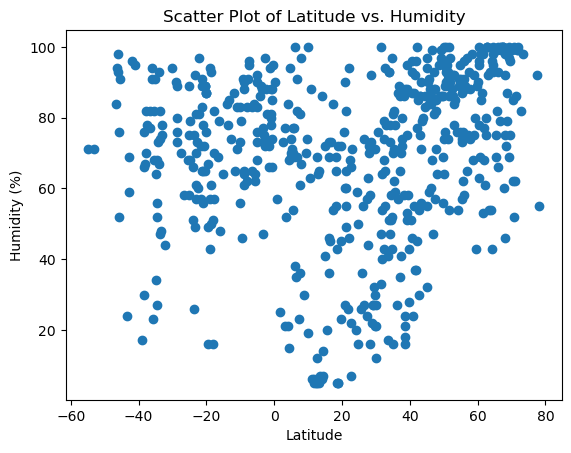

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

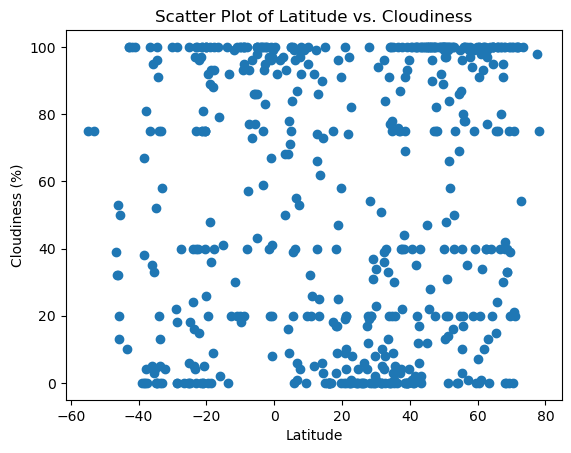

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

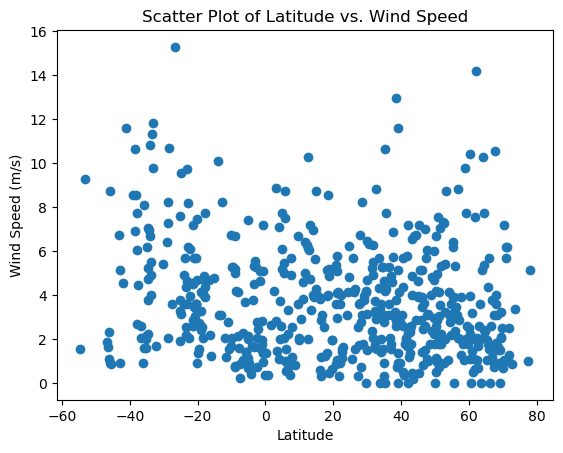

In [11]:
# Build scatter plot for latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("Scatter Plot of Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [12]:
# Define a function to create Linear Regression plots
# xAxis is independent variable
# yAxis is dependent variable
def linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xAxis, yAxis)
    regression = xAxis * slope + intercept
    linEQ = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))
    plt.scatter(xAxis,yAxis)
    plt.plot(xAxis,regression,"r-")
    print(f"The r-value is {rvalue}")
    
    plt.annotate(linEQ,(x_lin_plot,y_lin_plot),fontsize=10,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f"{yLabel}")
    
               

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lagoa,39.0500,-27.9833,15.73,88,93,11.61,PT,1678114796
2,severo-kurilsk,50.6789,156.1250,-1.21,90,97,4.97,RU,1678114796
7,upernavik,72.7868,-56.1549,-5.99,82,54,0.88,GL,1678114798
9,saint george,37.1041,-113.5841,5.14,65,75,1.54,US,1678114776
10,clyde river,70.4692,-68.5914,-14.87,85,0,1.03,CA,1678114800


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,florianopolis,-27.6146,-48.5012,29.24,70,40,3.60,BR,1678114795
3,bethlehem,-1.4558,-48.5044,31.02,66,40,4.63,BR,1678114649
4,puerto ayora,-0.7393,-90.3518,26.98,88,41,1.34,EC,1678114605
5,ushuaia,-54.8000,-68.3000,7.81,71,75,1.54,AR,1678114527
6,barabai,-2.5833,115.3833,22.89,97,100,0.74,ID,1678114797


The r-value is -0.8818544066128312


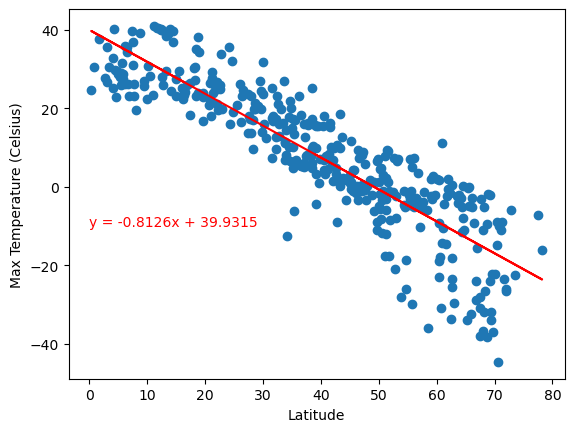

In [15]:
# Linear regression on Northern Hemisphere
yAxis = northern_hemi_df["Max Temp"]
xAxis = northern_hemi_df["Lat"]
y_lin_plot = -10
x_lin_plot = 0
yLabel = "Max Temperature (Celsius)"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig(f"Fig.5.png")
plt.show()

The r-value is 0.5384456004885804


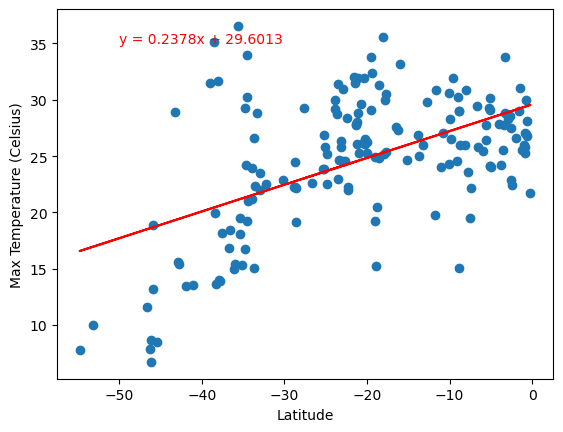

In [16]:
# Linear regression on Southern Hemisphere
yAxis = southern_hemi_df["Max Temp"]
xAxis = southern_hemi_df["Lat"]
y_lin_plot = 35
x_lin_plot = -50
yLabel = "Max Temperature (Celsius)"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig(f"Fig.6.png")
plt.show()

# Discussion on the linear relationship of Temperature vs. Latitude:
- In the Northern Hemisphere, temperature and latitude have strong negative correlation.  In the Southern Hemisphere, temperature and latitude have a moderate, positive correlation.  The dependent variable, temperature, appears to be more correlated to the independent variable, latitude, in the Northern Hemisphere than the Southern Hemisphere. 

The r-value is 0.4906355891317989


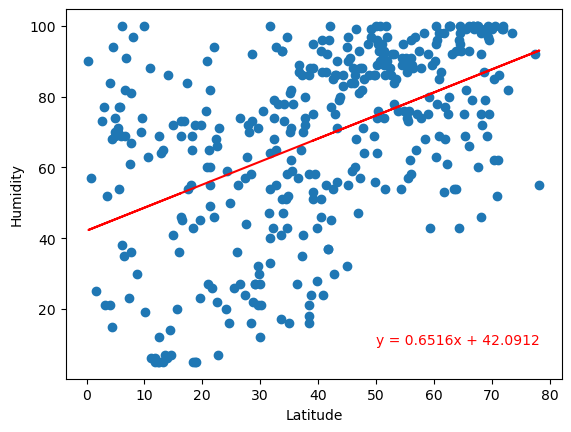

In [17]:
# Linear regression on Northern Hemisphere Humidity vs. Latitude
yAxis = northern_hemi_df["Humidity"]
xAxis = northern_hemi_df["Lat"]
y_lin_plot = 10
x_lin_plot = 50
yLabel = "Humidity"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig(f"Fig.7.png")
plt.show()

The r-value is 0.16471902664485735


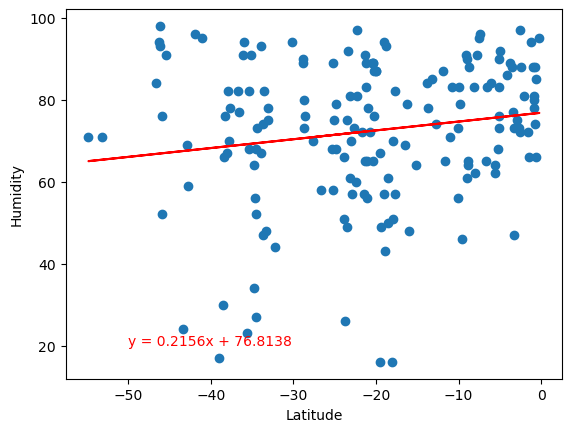

In [18]:
# Linear regression on Southern Hemisphere Humidity vs. Latitude
yAxis = southern_hemi_df["Humidity"]
xAxis = southern_hemi_df["Lat"]
y_lin_plot = 20
x_lin_plot = -50
yLabel = "Humidity"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig(f"Fig.8.png")
plt.show()

# Discussion on the linear relationship of Humidity vs. Latitude  <br>
- In the Northern Hemisphere, there is a moderate, positive correlation between Humidity and Latitude.  In the Southern Hemisphere, there is a weak, positive correlatin between Humidity and Latitude.  The Northern Hemisphere appears to have a stronger correlation between Humidity and Latitude than the the Southern Hemisphere.  

The r-value is 0.22249374259476443


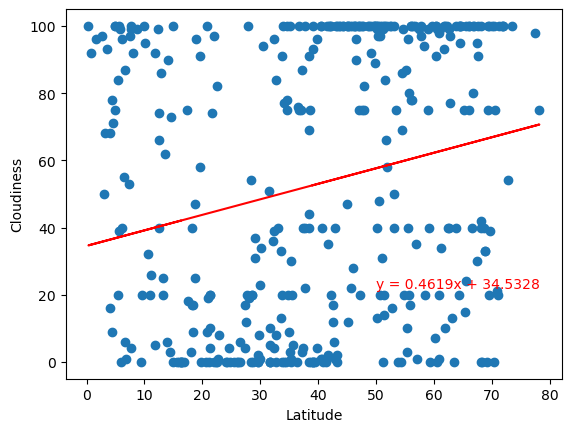

In [19]:
# Linear regression on Northern Hemisphere Cloudiness vs. Latitude
yAxis = northern_hemi_df["Cloudiness"]
xAxis = northern_hemi_df["Lat"]
y_lin_plot = 22
x_lin_plot = 50
yLabel = "Cloudiness"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig(f"Fig.9.png")
plt.show()

The r-value is 0.34616520262607076


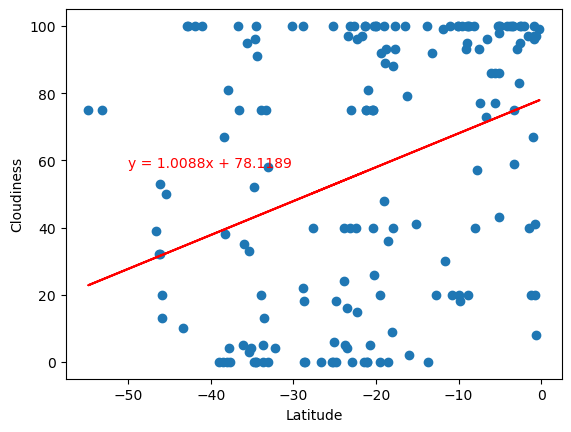

In [20]:
# Linear regression on Southern Hemisphere Cloudiness vs. Latitude
yAxis = southern_hemi_df["Cloudiness"]
xAxis = southern_hemi_df["Lat"]
y_lin_plot = 58
x_lin_plot = -50
yLabel = "Cloudiness"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig(f"Fig.10.png")
plt.show()

# Discussion on the linear relationshihp between Cloudiness and Latitude <br>
- Both the Northern and Southern Hemispheres have weak, positive correlations between Cloudiness and Latitude.  This suggests that Cloudiness and Latitude do not have strong linear relationships (or lines of good fit) between the independent variable, Latitude, and the dependent variable, Cloudiness.

The r-value is -0.0851331102288634


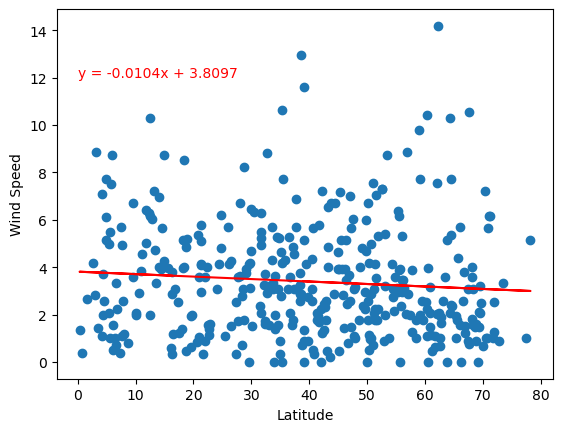

In [21]:
# Linear regression on Northern Hemisphere Wind Speed vs. Latitude
yAxis = northern_hemi_df["Wind Speed"]
xAxis = northern_hemi_df["Lat"]
y_lin_plot = 12
x_lin_plot = 0
yLabel = "Wind Speed"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig(f"Fig.11.png")
plt.show()

The r-value is -0.3036036699228352


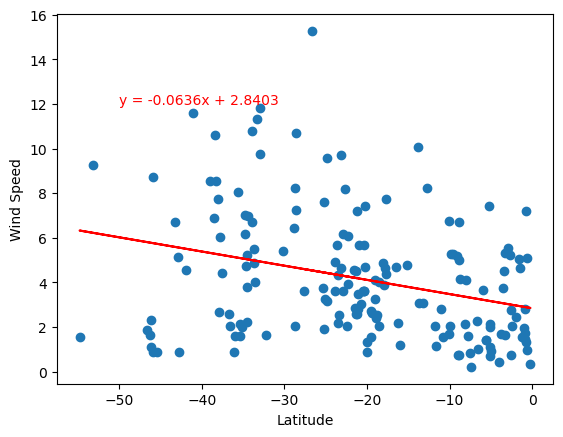

In [22]:
# Linear regression on Southern Hemisphere Wind Speed vs. Latitude
yAxis = southern_hemi_df["Wind Speed"]
xAxis = southern_hemi_df["Lat"]
y_lin_plot = 12
x_lin_plot = -50
yLabel = "Wind Speed"
linReg(xAxis,yAxis,x_lin_plot,y_lin_plot,yLabel)
plt.savefig(f"Fig.12.png")
plt.show()

# Discussion the linear relationship between Wind Speed and Latitude: <br>
- Both Hemispheres have weak negative correlations between Wind Speed and Latitude but the Northern r-value is very close to zero.  This suggests that the Northern Hemisphere has almost no correlation and is not a line of good fit.